<a href="https://colab.research.google.com/github/CSSamarasinghe/SE4050_Assignment/blob/IT21388934/dataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing data**

In [6]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import os
import shutil
import kagglehub
yacharki_amazon_reviews_for_sentianalysis_finegrained_csv_path = kagglehub.dataset_download('yacharki/amazon-reviews-for-sentianalysis-finegrained-csv')

print('Data source import complete.')

import pandas as pd
import os

# Assuming 'yacharki_amazon_reviews_for_sentianalysis_finegrained_csv_path' from the first cell
# contains the correct path to the downloaded dataset folder
data_folder = yacharki_amazon_reviews_for_sentianalysis_finegrained_csv_path

# Construct the full path to the train.csv file
file_path = os.path.join(data_folder, 'amazon_review_fine-grained_5_classes_csv', 'train.csv')
testFile_path =os.path.join(data_folder, 'amazon_review_fine-grained_5_classes_csv', 'test.csv')

# Load the dataset
train = pd.read_csv(file_path)
test = pd.read_csv(testFile_path)




Data source import complete.


**Checking the data set**

In [7]:

# Check the column names
print("Training data set")
print(train.columns)
print(train.shape)

print("Testing data set")
print(test.columns)
print(test.shape)

Training data set
Index(['class_index', 'review_title', 'review_text'], dtype='object')
(3000000, 3)
Testing data set
Index(['class_index', 'review_title', 'review_text'], dtype='object')
(650000, 3)


In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout


In [9]:
# Reduce the dataset to a manageable size (e.g., 5000 samples)
train_sample = train.sample(n=50000, random_state=42)

test_sample = test.sample(n=10000, random_state=42)

In [10]:
texts = train_sample['review_text'].astype(str).values  # Text reviews
labels = train_sample['class_index'].values  # Sentiment classes (e.g., 0, 1, 2, 3, 4)


In [11]:
# Tokenization and padding

max_length = 200  # Max length for each review
vocab_size = 10000  # Vocabulary size (can tune this)

tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')


In [12]:
# Step 5: Preprocess Labels
# Convert sentiment classes to numerical labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
# Convert to categorical (one-hot encoding)
categorical_labels = to_categorical(encoded_labels, num_classes=5)

In [13]:
# Step 5: Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(
    padded_sequences, categorical_labels, test_size=0.2, random_state=42)

In [14]:
# Step 7: Prepare Testing Data
# Preprocess the separate test dataset
test_texts = test_sample['review_text'].astype(str).values  # Text reviews from test set
test_labels = test_sample['class_index'].values  # Sentiment classes from test set

# Tokenize and pad the test texts
test_sequences = tokenizer.texts_to_sequences(test_texts)
test_padded_sequences = pad_sequences(test_sequences, maxlen=max_length, padding='post')



In [15]:
# Convert sentiment classes to numerical labels for test data
test_encoded_labels = label_encoder.transform(test_labels)  # Use transform instead of fit_transform
test_categorical_labels = to_categorical(test_encoded_labels, num_classes=5)


<ipython-input-16-f149528fecf1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_sample['class_index'], palette='Set2')


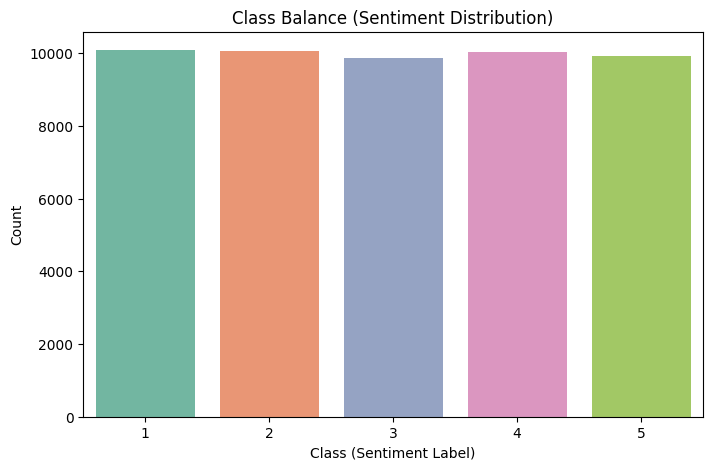

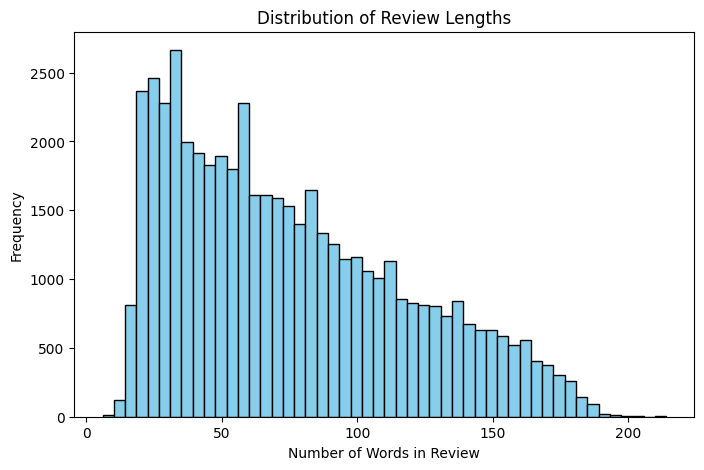

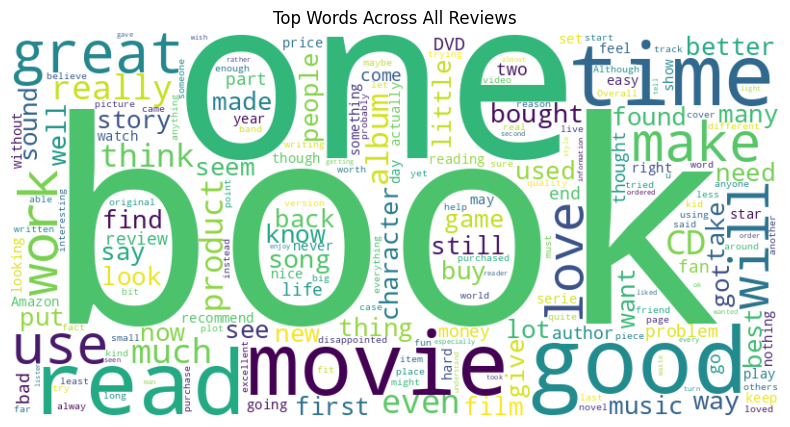

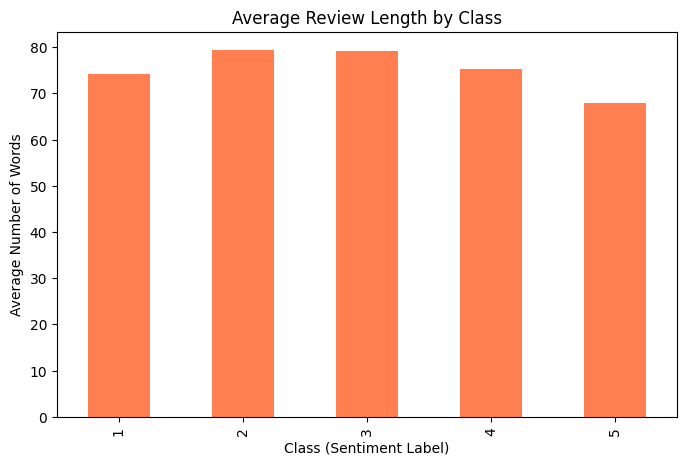

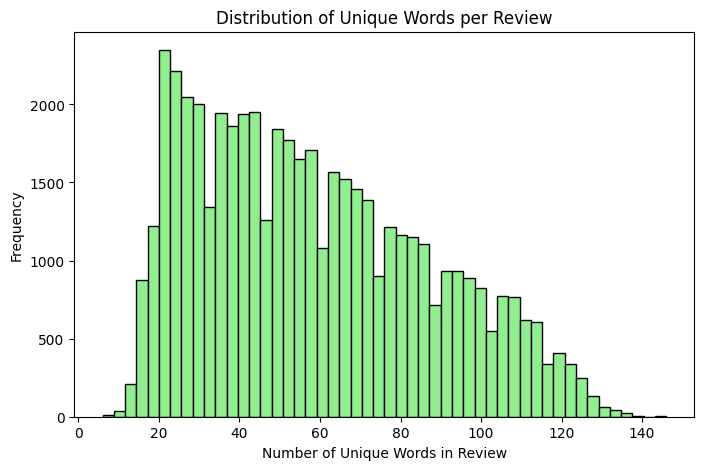

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np

# Visualization 1: Class Balance (Sentiment Distribution)
plt.figure(figsize=(8, 5))
sns.countplot(x=train_sample['class_index'], palette='Set2')
plt.title("Class Balance (Sentiment Distribution)")
plt.xlabel("Class (Sentiment Label)")
plt.ylabel("Count")
plt.show()


# Visualization 2: Review Length Distribution (in terms of number of words)
review_lengths = train_sample['review_text'].str.split().apply(len)
plt.figure(figsize=(8, 5))
plt.hist(review_lengths, bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Words in Review")
plt.ylabel("Frequency")
plt.show()

# Visualization 3: Top Words Across All Reviews (Word Cloud)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(train_sample['review_text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top Words Across All Reviews")
plt.show()

# Visualization 4: Average Review Length by Class (Sentiment Label)
avg_review_length_per_class = train_sample.groupby('class_index')['review_text'].apply(lambda x: x.str.split().apply(len).mean())
plt.figure(figsize=(8, 5))
avg_review_length_per_class.plot(kind='bar', color='coral')
plt.title("Average Review Length by Class")
plt.xlabel("Class (Sentiment Label)")
plt.ylabel("Average Number of Words")
plt.show()

# Visualization 5: Distribution of Unique Words per Review
unique_words_per_review = train_sample['review_text'].apply(lambda x: len(set(x.split())))
plt.figure(figsize=(8, 5))
plt.hist(unique_words_per_review, bins=50, color='lightgreen', edgecolor='black')
plt.title("Distribution of Unique Words per Review")
plt.xlabel("Number of Unique Words in Review")
plt.ylabel("Frequency")
plt.show()


<ipython-input-17-efa228c65b3f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='bigram', data=bigrams_df, palette='coolwarm')


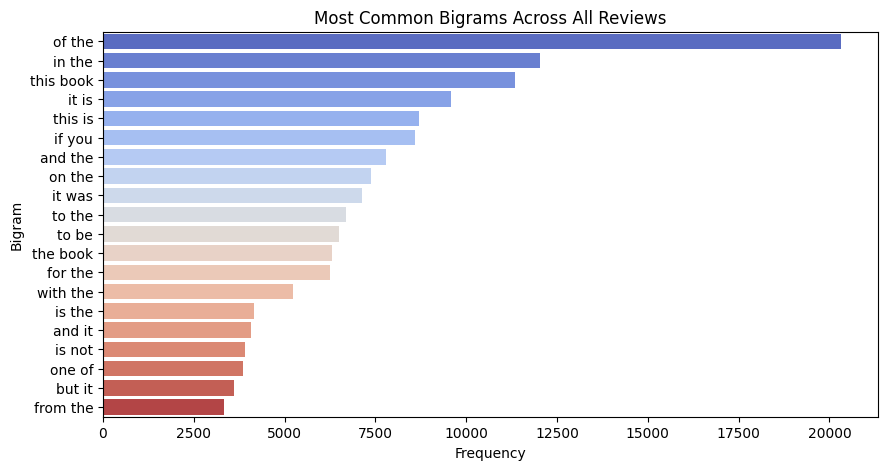

In [17]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

# Function to get bigrams
def get_top_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get top 20 bigrams
common_bigrams = get_top_bigrams(train_sample['review_text'].astype(str), 20)

# Create DataFrame for visualization
bigrams_df = pd.DataFrame(common_bigrams, columns=['bigram', 'frequency'])

# Visualization 3: Most Common Bigrams
plt.figure(figsize=(10, 5))
sns.barplot(x='frequency', y='bigram', data=bigrams_df, palette='coolwarm')
plt.title("Most Common Bigrams Across All Reviews")
plt.xlabel("Frequency")
plt.ylabel("Bigram")
plt.show()


In [18]:
# Step 9: Build the CNN Model
model = Sequential()

# Embedding Layer
model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=max_length))

# Convolutional Layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))

# Max Pooling Layer
model.add(MaxPooling1D(pool_size=2))

# Flatten the output of the CNN
model.add(Flatten())

# Dense Layer
model.add(Dense(10, activation='relu'))

# Output Layer with Softmax for multi-class classification (5 classes)
model.add(Dense(5, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [19]:
# Step 10: Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [20]:
# Step 11: Train the Model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.2711 - loss: 1.5413 - val_accuracy: 0.3881 - val_loss: 1.3051
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4598 - loss: 1.1980 - val_accuracy: 0.4541 - val_loss: 1.2397
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5540 - loss: 1.0267 - val_accuracy: 0.4680 - val_loss: 1.2614
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6574 - loss: 0.8294 - val_accuracy: 0.4537 - val_loss: 1.4427
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7645 - loss: 0.6303 - val_accuracy: 0.4445 - val_loss: 1.6923
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8486 - loss: 0.4532 - val_accuracy: 0.4318 - val_loss: 2.2234
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9107 - loss: 0.3075 - val_accuracy: 0.4223 - val_loss: 2.8435
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9441 - loss: 0.2125 - val_accuracy: 0.

In [21]:
test_loss, test_acc = model.evaluate(test_padded_sequences, test_categorical_labels)
print(f'Test Accuracy: {test_acc}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4233 - loss: 4.4605
Test Accuracy: 0.41670000553131104


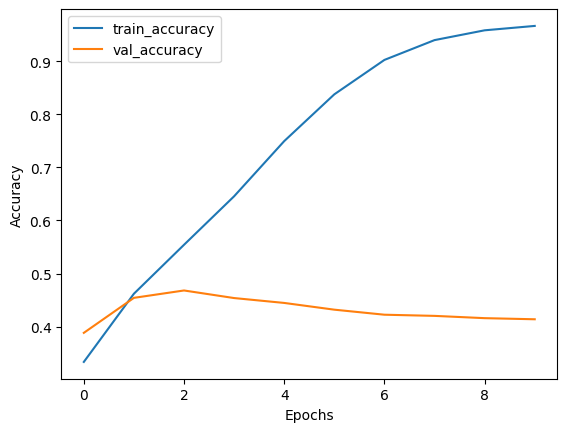

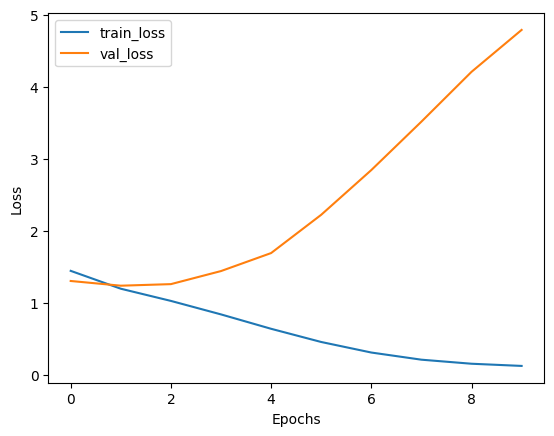

In [22]:
# Step 12: Plot Training and Validation Loss/Accuracy
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:

from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
import numpy as np
import matplotlib.pyplot as plt

# Step 12: Model evaluation with metrics (ADDED BELOW)
# Predict on validation set
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert to class labels
y_val_classes = np.argmax(y_val, axis=1)  # True class labels

# Compute accuracy
accuracy = accuracy_score(y_val_classes, y_pred_classes)
print(f'Accuracy: {accuracy:.4f}')

# Compute F1-score, precision, and recall
f1 = f1_score(y_val_classes, y_pred_classes, average='weighted')
precision = precision_score(y_val_classes, y_pred_classes, average='weighted')
recall = recall_score(y_val_classes, y_pred_classes, average='weighted')

print(f'F1-Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

# Classification report for detailed metrics
print(classification_report(y_val_classes, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.4137
F1-Score: 0.4215
Precision: 0.4514
Recall: 0.4137
              precision    recall  f1-score   support

           0       0.61      0.43      0.50      2062
           1       0.32      0.40      0.35      1964
           2       0.33      0.40      0.36      2023
           3       0.37      0.45      0.41      1982
           4       0.63      0.39      0.48      1969

    accuracy                           0.41     10000
   macro avg       0.45      0.41      0.42     10000
weighted avg       0.45      0.41      0.42     10000

